In [1]:
# Import Libraries and Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
import os 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Generic Momentum Screen

## Week 1

### Data Preparation

In [2]:
# Pick up the date we grabbed in our acquisition. Don't really need to rebalance often, so it doesn't make sense to pull via sdk and waste the message count of whatever service we use. 
file_path = Path('Resources/MSR_sp500_5yr_close.csv')

sp500_close = pd.read_csv(file_path,
                         parse_dates=True,
                         index_col='date',
                         infer_datetime_format=True)
sp500_close.head()

,date.1,date.2,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2015-04-06 00:00:00+00:00,2015-04-06T00:00:00.000Z,5.10,165.48,46.30,57.61,70.87,95.69,22.670,76.23,2.70,...,NaN,130.72,35.05,12.95,41.990,36.07,79.73,117.36,26.900,46.33
2015-04-07 00:00:00+00:00,2015-04-07T00:00:00.000Z,5.12,166.21,46.19,58.42,69.73,96.39,22.770,75.65,2.70,...,NaN,127.88,34.51,12.96,42.330,36.07,78.29,116.01,27.210,46.36
2015-04-08 00:00:00+00:00,2015-04-08T00:00:00.000Z,5.19,166.27,46.61,58.81,69.63,95.12,22.960,75.44,2.71,...,NaN,129.28,34.43,13.10,42.550,35.25,78.30,116.12,27.270,46.21
2015-04-09 00:00:00+00:00,2015-04-09T00:00:00.000Z,5.28,166.79,47.00,60.32,69.80,95.47,23.000,76.33,2.72,...,NaN,136.63,34.32,13.13,43.325,34.96,78.92,117.20,27.535,46.55
2015-04-10 00:00:00+00:00,2015-04-10T00:00:00.000Z,5.28,167.07,47.15,62.00,69.35,94.69,22.925,76.53,2.76,...,NaN,136.02,34.67,13.26,43.830,35.20,80.02,117.45,27.330,47.17


In [3]:
# End of dataset for determining FIP
last_day = "2020-03-02 00:00:00+00:00"
end = (sp500_close.index.get_loc(last_day))-len(sp500_close)

In [4]:
mid = sp500_close[(end+(-21*12)):(end-21)]
mid.tail()

,date.1,date.2,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23 00:00:00+00:00,NaN,NaN,177.74,90.73,85.27,184.46,210.68,60.13,351.76,51.71,...,206.66,139.11,66.90,36.23,102.41,82.36,105.98,149.51,47.79,138.34
2020-01-24 00:00:00+00:00,NaN,NaN,178.15,90.40,83.54,182.98,208.57,59.40,351.37,50.35,...,209.01,134.75,67.17,35.52,100.80,81.48,104.98,147.80,46.63,136.31
2020-01-27 00:00:00+00:00,NaN,NaN,175.63,89.59,84.02,181.45,206.55,58.32,346.90,49.26,...,207.43,123.89,66.92,35.05,97.00,80.22,104.39,148.04,46.46,135.96
2020-01-28 00:00:00+00:00,NaN,NaN,165.58,89.54,83.77,187.01,210.24,60.03,354.63,50.53,...,213.00,124.97,67.22,36.78,98.61,81.27,104.82,149.20,47.09,138.26
2020-01-29 00:00:00+00:00,NaN,NaN,162.00,89.14,83.20,188.85,207.96,60.40,351.66,47.51,...,212.66,123.85,67.42,36.73,88.06,83.17,106.63,150.75,46.37,138.51


In [5]:
short = sp500_close[(end+(-21)):(end-5)]
short.tail()

,date.1,date.2,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,NaN,NaN,161.01,89.66,94.05,167.22,212.37,63.520,379.67,55.31,...,213.67,132.14,70.26,37.82,90.17,88.14,105.28,160.40,46.26,144.17
2020-02-18 00:00:00+00:00,NaN,NaN,158.88,88.88,93.61,169.00,213.76,63.740,378.85,56.89,...,212.69,133.46,71.16,37.22,89.24,88.05,104.03,159.25,45.09,143.65
2020-02-19 00:00:00+00:00,NaN,NaN,159.34,89.36,94.14,167.90,215.92,64.370,383.28,58.90,...,211.76,136.17,70.79,36.77,90.71,87.96,105.19,160.02,45.81,144.06
2020-02-20 00:00:00+00:00,NaN,NaN,158.56,88.46,94.23,168.08,213.90,64.000,378.96,57.27,...,209.50,133.33,70.67,36.78,89.79,88.66,103.87,158.39,46.25,143.55
2020-02-21 00:00:00+00:00,NaN,NaN,156.93,87.45,94.96,166.74,211.89,63.375,372.95,53.28,...,208.44,127.95,70.82,36.34,87.72,88.52,103.51,157.39,45.43,142.23


In [6]:
overall_returns_mid = mid.pct_change()
cum_returns_mid = ((1+overall_returns_mid).cumprod()-1).iloc[[-1]]

overall_returns_short = short.pct_change()
cum_returns_short = ((1+overall_returns_short).cumprod()-1).iloc[[-1]]

### Generic Momentum

In [7]:
# Begin the process of moving the horizontal dataframe back to a vertical dataframe. 
return_list_mid = cum_returns_mid.stack()
return_list_short = cum_returns_short.stack()
return_list_mid

date                           
2020-01-29 00:00:00+00:00  MMM    -0.219239
                           ABT     0.134241
                           ABBV    0.038702
                           ABMD   -0.457421
                           ACN     0.266504
                                     ...   
                           XYL     0.089040
                           YUM     0.118066
                           ZBH     0.202057
                           ZION   -0.093805
                           ZTS     0.446580
Length: 502, dtype: float64

In [8]:
df_mid = return_list_mid.to_frame().reset_index()
df_short = return_list_short.to_frame().reset_index()
df_mid.head()

,date,level_1,0
0,2020-01-29 00:00:00+00:00,MMM,-0.219239
1,2020-01-29 00:00:00+00:00,ABT,0.134241
2,2020-01-29 00:00:00+00:00,ABBV,0.038702
3,2020-01-29 00:00:00+00:00,ABMD,-0.457421
4,2020-01-29 00:00:00+00:00,ACN,0.266504


In [9]:
# Clean up the dataframe
df_mid.rename(columns={0:"return","level_1":"symbol"}, inplace=True)
df_short.rename(columns={0:"return","level_1":"symbol"}, inplace=True)

df_mid.drop(columns=['date'], inplace=True)
df_short.drop(columns=['date'], inplace=True)

df_mid.set_index(df_mid['symbol'], inplace=True)
df_short.set_index(df_short['symbol'], inplace=True)

df_mid.drop(columns=['symbol'], inplace=True)
df_short.drop(columns=['symbol'], inplace=True)

df_mid.sort_values(['return'],ascending=False,inplace=True)
df_short.sort_values(['return'],ascending=False,inplace=True)

df_mid['decile_rank'] = pd.qcut(df_mid['return'],10,labels=False)
df_short['decile_rank'] = pd.qcut(df_short['return'],10,labels=False)

df_mid.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_mid = df_mid.loc[df_mid['decile_rank']==9]

df_short.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_short = df_short.loc[df_short['decile_rank']==9]

In [10]:
top_decile_mid

,return,decile_rank
symbol,,
AMD,1.006334,9
SNPS,0.457893,9
MKTX,0.448188,9
ZTS,0.446580,9
LEN,0.441208,9
SWKS,0.438034,9
CMG,0.437634,9
ALLE,0.434430,9
CAG,0.427343,9


In [11]:
top_decile_short

,return,decile_rank
symbol,,
TMUS,0.217816,9
AMD,0.092251,9
HES,0.100068,9
NEM,0.099400,9
J,0.099164,9
DLR,0.098537,9
CL,0.097884,9
DISH,0.097844,9
IBM,0.095562,9


### FIP = sign(Past return) * [% negative - % positive]

In [12]:
# The signal here is that we need to remove "low quality" momentum. Stocks that "pop" are shown to be overpriced and generally under-perform. The underperformance is the result of mispricing caused by biased investors whom overpay for lottery-like stocks. 

# The more negative the FIP, the better. We are seperating high momentum stocks into those that have more continuous price paths. 
    # If FIP scores are positive, then automatically the security had poor returns over the last year (it was a negative number). 
    # If FIP is a little negative, it had positive returns, but a bumpy ride. 
    # If FIP is very negative, then smoother path, which reflects the behavioral irrational decision making of "lack of attention". 
    # The lack of attention is the best momentum, where these securities are more likely to suffer from why momentum stocks outperform: investors are systematically underreacting to positive news. 

fip_scores_mid = []
for column in overall_returns_mid.columns:
    num_positive_mid = len(overall_returns_mid.loc[overall_returns_mid[column] > 0])
    num_negative_mid = len(overall_returns_mid.loc[overall_returns_mid[column] < 0])
    num_zero_mid = len(overall_returns_mid.loc[overall_returns_mid[column] == 0])
    num_days_mid = len(overall_returns_mid)
    cum_returns_mid = overall_returns_mid[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_mid = np.sign(cum_returns_mid) * (num_negative_mid / num_days_mid - num_positive_mid/num_days_mid)
    
    fip_scores_mid.append(fip_score_mid)
    
fip_scores_short = []
for column in overall_returns_short.columns:
    num_positive_short = len(overall_returns_short.loc[overall_returns_short[column] > 0])
    num_negative_short = len(overall_returns_short.loc[overall_returns_short[column] < 0])
    num_zero_short = len(overall_returns_short.loc[overall_returns_short[column] == 0])
    num_days_short = len(overall_returns_short)
    cum_returns_short = overall_returns_short[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_short = np.sign(cum_returns_short) * (num_negative_short / num_days_short - num_positive_short/num_days_short)
    
    fip_scores_short.append(fip_score_short)

In [13]:
fip_scores_series_mid = pd.Series(fip_scores_mid, index = overall_returns_mid.columns)
fip_scores_series_mid.name = "fip_scores_mid"

fip_scores_series_short = pd.Series(fip_scores_short, index = overall_returns_short.columns)
fip_scores_series_short.name = "fip_scores_short"

In [14]:
# Import additional libraries
import plotly.express as px
import seaborn as sns

In [15]:
x_mid = top_decile_mid.merge(fip_scores_series_mid, right_index=True, left_index=True).sort_values(by='fip_scores_mid', ascending=True)[:5]
x_short = top_decile_short.merge(fip_scores_series_short, right_index=True, left_index=True).sort_values(by='fip_scores_short', ascending=True)[:5]

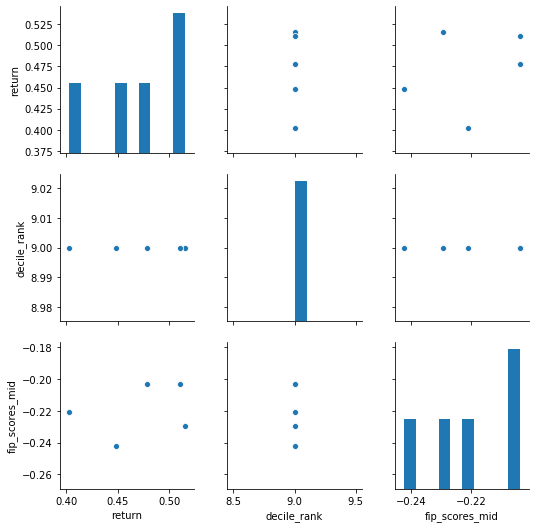

In [16]:
sns.pairplot(x_mid)

In [17]:
x_mid

,return,decile_rank,fip_scores_mid
MKTX,0.448188,9,-0.242424
GPN,0.515476,9,-0.229437
SO,0.402561,9,-0.220779
WU,0.510708,9,-0.203463
INFO,0.478140,9,-0.203463


In [18]:
x_short

,return,decile_rank,fip_scores_short
EQIX,0.087877,9,-0.5625
JKHY,0.117201,9,-0.4375
AMD,0.092251,9,-0.4375
AMG,0.105466,9,-0.4375
NEM,0.099400,9,-0.4375


In [19]:
mid_stocks = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_mid.index:
        mid_stocks[i] = sp500_close[i]

In [20]:
short_stocks = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_short.index:
        short_stocks[i] = sp500_close[i]

In [21]:
# Determine the last price from test +1
short_last_day_loc = short_stocks.index.get_loc(last_day)
last_price = short_stocks.iloc[short_last_day_loc]
last_price

AMD      47.46
AMG      78.36
EQIX    618.88
JKHY    158.73
NEM      46.83
Name: 2020-03-02 00:00:00+00:00, dtype: float64

In [22]:
# Determine the portfolio weight based on last trade day and $1000 investment
portfolio_weights = []
for ticker in last_price:
    weight = 200/ticker
    portfolio_weights.append(weight)

In [23]:
# Create a column for portfolio value over time based on weight of stocks above
short_stocks["portfolio_value"] = short_stocks.dot(portfolio_weights)

In [24]:
# Create a columns for percent change 1 day and 5 days
short_stocks["port_val_chg_1_days"] = short_stocks.portfolio_value.pct_change(periods=1)
short_stocks["port_val_chg_5_days"] = short_stocks.portfolio_value.pct_change(periods=5)

In [25]:
# Create a column for portfolio value over time based on weight of stocks above
bin_list = []
bin_list = short_stocks["port_val_chg_5_days"].tolist()
bin_calc = [1 if v >= 0 else 0 for v in bin_list]
short_stocks["port_val_chg_5_days_bin"] = bin_calc

In [26]:
short_stocks.head(10)

,AMD,AMG,EQIX,JKHY,NEM,portfolio_value,port_val_chg_1_days,port_val_chg_5_days,port_val_chg_5_days_bin
date,,,,,,,,,
2015-04-06 00:00:00+00:00,2.700,215.14,235.15,70.09,22.58,821.224203,NaN,NaN,0
2015-04-07 00:00:00+00:00,2.700,214.17,234.29,69.33,22.17,815.761913,-0.006651,NaN,0
2015-04-08 00:00:00+00:00,2.710,215.74,239.09,69.07,22.08,820.650420,0.005993,NaN,0
2015-04-09 00:00:00+00:00,2.720,218.70,240.06,68.42,22.23,828.382520,0.009422,NaN,0
2015-04-10 00:00:00+00:00,2.760,217.70,239.65,68.03,22.33,825.801939,-0.003115,NaN,0
2015-04-13 00:00:00+00:00,2.780,219.10,239.77,68.15,22.57,830.674436,0.005900,0.011507,1
2015-04-14 00:00:00+00:00,2.670,219.86,241.49,68.41,22.82,834.101787,0.004126,0.022482,1
2015-04-15 00:00:00+00:00,2.700,219.51,241.19,67.62,23.55,835.360206,0.001509,0.017925,1
2015-04-16 00:00:00+00:00,2.870,219.93,241.56,67.33,23.62,837.201698,0.002204,0.010646,1


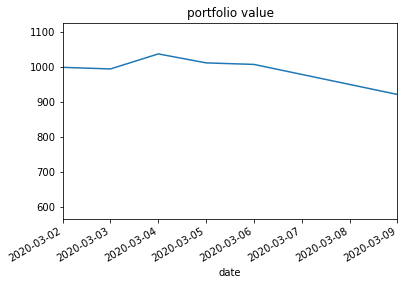

In [27]:
short_stocks.dropna(inplace=True)

# Chart results
short_stocks.portfolio_value.plot(title="portfolio value",xlim=("2020-03-02 00:00:00+00:00","2020-03-09 00:00:00+00:00"))

In [28]:
short_stocks.tail(30)

,AMD,AMG,EQIX,JKHY,NEM,portfolio_value,port_val_chg_1_days,port_val_chg_5_days,port_val_chg_5_days_bin
date,,,,,,,,,
2020-02-24 00:00:00+00:00,49.12,85.28,644.90,167.93,50.26,1059.306916,-0.027921,-0.000015,0
2020-02-25 00:00:00+00:00,47.57,82.33,631.98,163.75,49.14,1031.020400,-0.026703,-0.038873,0
2020-02-26 00:00:00+00:00,47.49,81.68,629.84,160.55,49.40,1025.411088,-0.005441,-0.062475,0
2020-02-27 00:00:00+00:00,44.01,80.28,597.49,154.55,46.53,976.901378,-0.047308,-0.112698,0
2020-02-28 00:00:00+00:00,45.48,75.22,572.80,151.74,44.63,950.547326,-0.026977,-0.127725,0
2020-03-02 00:00:00+00:00,47.46,78.36,618.88,158.73,46.83,1000.000000,0.052025,-0.055987,0
2020-03-03 00:00:00+00:00,46.75,73.81,615.16,157.79,49.73,995.393589,-0.004606,-0.034555,0
2020-03-04 00:00:00+00:00,50.11,75.42,645.49,165.40,51.00,1038.476181,0.043282,0.012741,1
2020-03-05 00:00:00+00:00,48.11,70.70,616.67,164.99,52.08,1012.783297,-0.024741,0.036730,1


## Week 2 

### Data Preparation

In [29]:
# End of dataset for determining FIP
last_day_wk2 = "2020-03-09 00:00:00+00:00"
end2 = (sp500_close.index.get_loc(last_day_wk2))-len(sp500_close)

In [30]:
mid2 = sp500_close[(end2+(-21*12)):(end2-21)]
mid2.tail()

,date.1,date.2,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30 00:00:00+00:00,NaN,NaN,162.51,89.16,81.78,186.85,208.37,60.89,356.74,48.78,...,214.75,126.62,68.76,36.98,87.20,83.66,106.60,151.18,46.760,138.03
2020-01-31 00:00:00+00:00,NaN,NaN,158.66,87.14,81.02,186.29,205.21,58.48,351.14,47.00,...,211.29,126.16,69.19,35.57,84.48,81.66,105.77,147.90,45.490,134.21
2020-02-03 00:00:00+00:00,NaN,NaN,156.59,87.06,82.30,185.95,207.80,58.21,358.00,48.02,...,215.11,128.58,69.45,36.29,85.05,83.34,106.41,148.51,46.105,135.52
2020-02-04 00:00:00+00:00,NaN,NaN,157.24,88.23,84.36,190.90,212.53,59.21,366.74,49.45,...,218.57,132.70,69.30,36.57,85.78,86.51,106.71,156.77,46.680,138.97
2020-02-05 00:00:00+00:00,NaN,NaN,162.33,89.56,86.63,190.73,212.22,58.85,365.55,49.84,...,220.06,132.28,69.30,37.62,88.23,87.61,106.78,157.70,48.010,137.89


In [31]:
short2 = sp500_close[(end2+(-21)):(end2-5)]
short2.tail()

,date.1,date.2,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24 00:00:00+00:00,NaN,NaN,152.55,84.63,93.14,165.29,204.36,62.31,357.41,49.12,...,205.54,120.17,70.37,34.86,85.18,86.43,100.25,154.33,43.760,138.39
2020-02-25 00:00:00+00:00,NaN,NaN,146.85,81.13,89.18,158.80,197.10,59.51,347.80,47.57,...,202.64,113.89,68.84,36.46,83.88,84.33,97.95,149.73,42.380,134.82
2020-02-26 00:00:00+00:00,NaN,NaN,148.96,81.36,88.41,154.09,195.67,59.37,351.34,47.49,...,204.44,110.75,68.35,35.73,82.60,83.93,97.50,146.56,41.815,136.15
2020-02-27 00:00:00+00:00,NaN,NaN,150.16,79.19,85.42,153.97,186.44,58.33,337.52,44.01,...,194.53,111.16,64.85,33.83,79.49,80.66,92.67,139.95,40.590,133.95
2020-02-28 00:00:00+00:00,NaN,NaN,149.24,77.03,85.71,150.26,180.59,58.13,345.12,45.48,...,189.25,107.98,62.32,32.20,83.49,77.34,89.25,136.15,39.950,133.23


In [32]:
overall_returns_mid2 = mid2.pct_change()
cum_returns_mid2 = ((1+overall_returns_mid2).cumprod()-1).iloc[[-1]]

overall_returns_short2 = short2.pct_change()
cum_returns_short2 = ((1+overall_returns_short2).cumprod()-1).iloc[[-1]]

### Generic Momentum

In [33]:
# Begin the process of moving the horizontal dataframe back to a vertical dataframe. 
return_list_mid2 = cum_returns_mid2.stack()
return_list_short2 = cum_returns_short2.stack()
return_list_mid2

date                           
2020-02-05 00:00:00+00:00  MMM    -0.191946
                           ABT     0.168733
                           ABBV    0.116654
                           ABMD   -0.392986
                           ACN     0.312512
                                     ...   
                           XYL     0.166889
                           YUM     0.104583
                           ZBH     0.296768
                           ZION   -0.014168
                           ZTS     0.492155
Length: 502, dtype: float64

In [34]:
df_mid2 = return_list_mid2.to_frame().reset_index()
df_short2 = return_list_short2.to_frame().reset_index()
df_mid2.head()

,date,level_1,0
0,2020-02-05 00:00:00+00:00,MMM,-0.191946
1,2020-02-05 00:00:00+00:00,ABT,0.168733
2,2020-02-05 00:00:00+00:00,ABBV,0.116654
3,2020-02-05 00:00:00+00:00,ABMD,-0.392986
4,2020-02-05 00:00:00+00:00,ACN,0.312512


In [35]:
# Clean up the dataframe
df_mid2.rename(columns={0:"return","level_1":"symbol"}, inplace=True)
df_short2.rename(columns={0:"return","level_1":"symbol"}, inplace=True)

df_mid2.drop(columns=['date'], inplace=True)
df_short2.drop(columns=['date'], inplace=True)

df_mid2.set_index(df_mid2['symbol'], inplace=True)
df_short2.set_index(df_short2['symbol'], inplace=True)

df_mid2.drop(columns=['symbol'], inplace=True)
df_short2.drop(columns=['symbol'], inplace=True)

df_mid2.sort_values(['return'],ascending=False,inplace=True)
df_short2.sort_values(['return'],ascending=False,inplace=True)

df_mid2['decile_rank'] = pd.qcut(df_mid2['return'],10,labels=False)
df_short2['decile_rank'] = pd.qcut(df_short2['return'],10,labels=False)

df_mid2.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_mid2 = df_mid2.loc[df_mid2['decile_rank']==9]

df_short2.sort_values(['decile_rank'],ascending=False,inplace=True)
top_decile_short2 = df_short2.loc[df_short2['decile_rank']==9]

In [36]:
top_decile_mid2

,return,decile_rank
symbol,,
AMD,1.264425,9
KLAC,0.503115,9
SNPS,0.494283,9
SWKS,0.493074,9
ZTS,0.492155,9
FTNT,0.484815,9
MA,0.479785,9
DHI,0.477228,9
CDW,0.473889,9


In [37]:
top_decile_short2

,return,decile_rank
symbol,,
REGN,0.140362,9
ES,-0.048531,9
ZTS,-0.041304,9
SJM,-0.044354,9
LH,-0.044540,9
NOW,-0.045683,9
AMT,-0.046297,9
K,-0.047116,9
IRM,-0.047604,9


### FIP = sign(Past return) * [% negative - % positive]

In [38]:
# The signal here is that we need to remove "low quality" momentum. Stocks that "pop" are shown to be overpriced and generally under-perform. The underperformance is the result of mispricing caused by biased investors whom overpay for lottery-like stocks. 

# The more negative the FIP, the better. We are seperating high momentum stocks into those that have more continuous price paths. 
    # If FIP scores are positive, then automatically the security had poor returns over the last year (it was a negative number). 
    # If FIP is a little negative, it had positive returns, but a bumpy ride. 
    # If FIP is very negative, then smoother path, which reflects the behavioral irrational decision making of "lack of attention". 
    # The lack of attention is the best momentum, where these securities are more likely to suffer from why momentum stocks outperform: investors are systematically underreacting to positive news. 

fip_scores_mid2 = []
for column in overall_returns_mid2.columns:
    num_positive_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] > 0])
    num_negative_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] < 0])
    num_zero_mid2 = len(overall_returns_mid2.loc[overall_returns_mid2[column] == 0])
    num_days_mid2 = len(overall_returns_mid2)
    cum_returns_mid2 = overall_returns_mid2[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_mid2 = np.sign(cum_returns_mid2) * (num_negative_mid2 / num_days_mid2 - num_positive_mid2/num_days_mid2)
    
    fip_scores_mid2.append(fip_score_mid2)
    
fip_scores_short2 = []
for column in overall_returns_short2.columns:
    num_positive_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] > 0])
    num_negative_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] < 0])
    num_zero_short2 = len(overall_returns_short2.loc[overall_returns_short2[column] == 0])
    num_days_short2 = len(overall_returns_short2)
    cum_returns_short2 = overall_returns_short2[column].sum() # this will be deprecated to calculate Generic Momentum, which will be past year minus
                                                # most recent month. 
    
    fip_score_short2 = np.sign(cum_returns_short2) * (num_negative_short2 / num_days_short2 - num_positive_short2/num_days_short2)
    
    fip_scores_short2.append(fip_score_short2)

In [39]:
fip_scores_series_mid2 = pd.Series(fip_scores_mid2, index=overall_returns_mid2.columns)
fip_scores_series_mid2.name = "fip_scores_mid2"

fip_scores_series_short2 = pd.Series(fip_scores_short2, index=overall_returns_short2.columns)
fip_scores_series_short2.name = "fip_scores_short2"

In [40]:
fip_scores_series_mid2

date.1    0.000000
date.2    0.000000
MMM      -0.025974
ABT      -0.142857
ABBV     -0.060606
            ...   
XYL      -0.090909
YUM      -0.086580
ZBH      -0.077922
ZION     -0.116883
ZTS      -0.164502
Name: fip_scores_mid2, Length: 505, dtype: float64

In [41]:
x_mid2 = top_decile_mid2.merge(fip_scores_series_mid2, right_index=True, left_index=True).sort_values(by = 'fip_scores_mid2', ascending=True)[:5]
x_short2 = top_decile_short2.merge(fip_scores_series_short2, right_index=True, left_index=True).sort_values(by = 'fip_scores_short2', ascending=True)[:5]

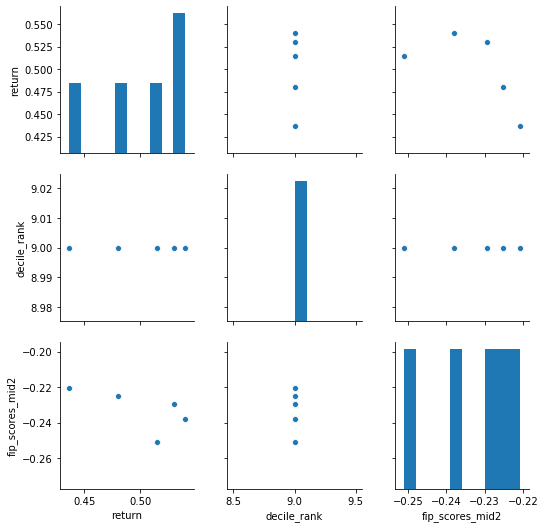

In [42]:
sns.pairplot(x_mid2)

In [43]:
x_mid2

,return,decile_rank,fip_scores_mid2
MKTX,0.514823,9,-0.251082
GPN,0.539672,9,-0.238095
INFO,0.529501,9,-0.229437
MA,0.479785,9,-0.225108
EFX,0.436377,9,-0.220779


In [44]:
x_short2

,return,decile_rank,fip_scores_short2
ICE,-0.009877,9,-0.4375
REGN,0.140362,9,-0.3125
AAP,-0.010345,9,-0.3125
XLNX,-0.048222,9,-0.3125
K,-0.047116,9,-0.3125


In [45]:
mid_stocks2 = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_mid2.index:
        mid_stocks2[i] = sp500_close[i]

In [46]:
short_stocks2 = pd.DataFrame()
for i in sp500_close.columns:
    if i in x_short2.index:
        short_stocks2[i] = sp500_close[i]

In [47]:
# Determine last price from test +1
short_last_day_loc2 = short_stocks2.index.get_loc(last_day_wk2)
last_price2 = short_stocks2.iloc[short_last_day_loc2]
last_price2

AAP     130.36
ICE      88.62
K        62.41
REGN    474.44
XLNX     73.68
Name: 2020-03-09 00:00:00+00:00, dtype: float64

In [48]:
# Determine new investment
last_day_wk2
rebalance_loc = (short_stocks.index.get_loc(last_day_wk2))
rebalance_amount = short_stocks.portfolio_value.iloc[rebalance_loc]/5
rebalance_amount

184.47251253485672

In [49]:
# Determine the portfolio weight based on last trade day and $1000 investment
portfolio_weights2 = []
for ticker in last_price2:
    weight2 = rebalance_amount/ticker
    portfolio_weights2.append(weight2)

In [50]:
# Create a column for portfolio value over time based on weight of stocks above
short_stocks2["portfolio_value"] = short_stocks2.dot(portfolio_weights2)

In [51]:
# Create a columns for percent change 1 day and 5 days
short_stocks2["port_val_chg_1_days"] = short_stocks2.portfolio_value.pct_change(periods=1)
short_stocks2["port_val_chg_5_days"] = short_stocks2.portfolio_value.pct_change(periods=5)

In [52]:
# Create a column for portfolio value over time based on weight of stocks above
bin_list2 = []
bin_list2 = short_stocks2["port_val_chg_5_days"].tolist()
bin_calc2 = [1 if v >= 0 else 0 for v in bin_list2]
short_stocks2["port_val_chg_5_days_bin"] = bin_calc2

In [53]:
short_stocks2.head(10)

,AAP,ICE,K,REGN,XLNX,portfolio_value,port_val_chg_1_days,port_val_chg_5_days,port_val_chg_5_days_bin
date,,,,,,,,,
2015-04-06 00:00:00+00:00,145.73,229.33,66.03,440.23,41.990,1155.072635,NaN,NaN,0
2015-04-07 00:00:00+00:00,146.71,229.81,65.74,441.65,42.330,1158.004805,0.002539,NaN,0
2015-04-08 00:00:00+00:00,148.81,230.50,65.59,453.19,42.550,1167.007271,0.007774,NaN,0
2015-04-09 00:00:00+00:00,148.05,230.89,65.49,455.04,43.325,1169.107728,0.001800,NaN,0
2015-04-10 00:00:00+00:00,150.20,231.91,65.73,461.39,43.830,1178.716220,0.008219,NaN,0
2015-04-13 00:00:00+00:00,149.18,230.79,65.46,456.98,43.725,1172.165750,-0.005557,0.014798,1
2015-04-14 00:00:00+00:00,149.05,228.88,65.58,455.07,43.135,1166.140773,-0.005140,0.007026,1
2015-04-15 00:00:00+00:00,149.58,229.79,65.17,453.89,43.895,1169.017160,0.002467,0.001722,1
2015-04-16 00:00:00+00:00,150.00,229.88,65.05,457.42,44.325,1171.893280,0.002460,0.002383,1


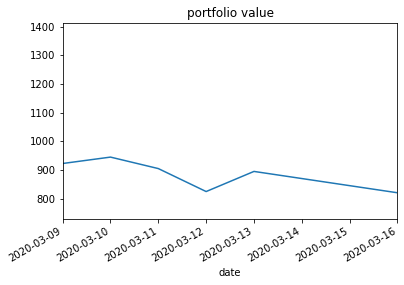

In [54]:
short_stocks2.dropna(inplace=True)

# Chart results
short_stocks2.portfolio_value.plot(title="portfolio value",xlim=("2020-03-09 00:00:00+00:00","2020-03-16 00:00:00+00:00"))

# LSTM Stock Predictor (FEATURE: Daily Change)

In [55]:
# Import additional libraries and dependencies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [56]:
# Set the random seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [57]:
dates = {'Week1':['Resources/sp500_mom_short.csv',
                              '2020-03-02',
                              '2020-03-06'
                             ],
         'Week2':['Resources/sp500_mom_short_wk2.csv',
                            '2020-03-09',
                             '2020-03-13'
                            ]}

In [58]:
def LSTM_predictor(week):
    
    # Load the stock prices
    SP500_full = pd.read_csv(dates[week][0], index_col='date',infer_datetime_format=True, parse_dates=True)
    SP500_full.reset_index(inplace=True)
    SP500_full['date'] = SP500_full['date'].dt.date
    SP500_full.index = pd.to_datetime(SP500_full['date'])
    SP500_full.drop(columns=['date'],inplace=True)
    
    # Trim the Dataframe to the relevant dates.
    df = SP500_full.loc[:dates[week][1]]
    
###############################################################################################  

    # This function accepts the column number for the features (X) and the target (y):
    ### It chunks the data up with a rolling window of Xt-n to predict Xt
    ### It returns a numpy array of X any y
    def window_data(df, window, feature_col_number, target_col_number):
        X = []
        y = []
        for i in range(len(df) - window):
            features = df.iloc[i:(i + window), feature_col_number]
            target = df.iloc[(i + window), target_col_number]
            X.append(features)
            y.append(target)
        return np.array(X), np.array(y).reshape(-1, 1)
   
    # Predict Closing Prices using a 10 day window of previous closing prices
    # Try a window size anywhere from 1 to 10 and see how the model performance changes

    # Creating the features (X) and target (y) data using the window_data() function.
    window_size = 2

    # Column index 1 is the `Close` column
    feature_column = 7 
    target_column = 7
    X, y = window_data(df, window_size, feature_column, target_column)    
    
################################################################################################ 

    # Use 70% of the data for training and the remaineder for testing
    split = int(0.7 *len(X))
    X_train_rnn = X[: split -1]
    X_test = X[split:]
    y_train_rnn = y[: split -1]
    y_test = y[split:]

    X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)
    
################################################################################################ 

    # Use MinMaxScaler to scale the data between 0 and 1. 
    scaler = MinMaxScaler()
    
    scaler.fit(X)
    X_train_rnn = scaler.transform(X_train_rnn)
    X_val_rnn = scaler.transform(X_val_rnn)
    X_test = scaler.transform(X_test)
    
    scaler.fit(y)
    y_train_rnn = scaler.transform(y_train_rnn)
    y_val_rnn = scaler.transform(y_val_rnn)
    y_test =scaler.transform(y_test)

################################################################################################ 

    # Reshape the features for the model
    X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
    X_val_rnn = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
################################################################################################ 

    # BUILDING AND TRAINING THE LSTM RNN

    # Build the LSTM model. 
    # The return sequences need to be set to True if you are adding additional LSTM layers, but you don't have to do this for the final layer. 
    model = Sequential()

    number_units = 100
    dropout_fraction = 0.4

    # First Layer:
    model.add(LSTM(
        units=number_units,
        return_sequences=True,
        input_shape=(X_train_rnn.shape[1], 1))
        )
    model.add(Dropout(dropout_fraction))
    
    # Second Layer:
    model.add(LSTM(units=number_units, return_sequences=True))
    model.add(Dropout(dropout_fraction))
   
    # Third Layer:
    model.add(LSTM(units=number_units, return_sequences=True))
    model.add(Dropout(dropout_fraction))
    
    # Fourth Layer:
    model.add(LSTM(units=number_units))
    model.add(Dropout(dropout_fraction))

    # Output Layer:
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")
    
################################################################################################ 

    # Train the model
    # Use at least 10 epochs
    # Do not shuffle the data
    # Experiement with the batch size, but a smaller batch size is recommended
    batch_size = 60
    epochs = 200
    model.fit(
        X_train_rnn,
        y_train_rnn,
        validation_data=(X_val_rnn, y_val_rnn),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    
################################################################################################

    # OUT OF SAMPLE PREDICTIONS
    seq = df[df.columns[feature_column]][-2:].tolist()
    forecast = []
    for i in range (5):
        prediction = model.predict([np.array(seq).reshape(1,X_train_rnn.shape[1],1)])
        seq.append(prediction[0][0])
        seq.pop(0)
        forecast.append([prediction[0][0]])

    forecast_scaled = scaler.inverse_transform(forecast)
    fwd_prices = forecast_scaled.ravel()
    
    real_prices = SP500_full[SP500_full.columns[feature_column]][dates[week][1]:dates[week][2]].tolist()
    A = SP500_full.loc[dates[week][1]:dates[week][2]].index
    out_of_sample = pd.DataFrame({'Real_Prices':real_prices,
                          'Look_Fwd_Prices':fwd_prices},
                          index=A)
    
    look_fwd = pd.concat([SP500_full[SP500_full.columns[feature_column]][:dates[week][2]],out_of_sample],axis=1,join='outer')
    look_fwd_2020 = look_fwd.iloc[-5:]

    
################################################################################################

    # IN SAMPLE PREDICTIONS
    predicted = model.predict(X_test)
    
    # Recover the original prices instead of the scaled version
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Create a dataframe of real and predicted values
    stock_closing = pd.DataFrame({
        "Real": real_prices.ravel(),
        "Predicted": predicted_prices.ravel()
    })
    
################################################################################################

    #PLOT THE RESULTS
    
    #IN SAMPLE
    IN_SAMP = plt.figure()
    stock_closing.plot(title='Close price predictions using LSTM RNN on closing price',figsize=(20,10))
    IN_SAMP.savefig('Resources/in-sample-results_'+str(week)+ '.png')
    stock_closing.to_csv('Resources/in-sample-results_'+str(week)+ '.csv')
    
    #OUT OF SAMPLE
    FWD_SMALL = plt.figure()
    out_of_sample.plot(figsize=(20,10), title='Real Price Data vs Look Fwd Prices (5 Days)')
    FWD_SMALL.savefig('Resources/out-samp-small-results_' +str(week)+ '.png')
    out_of_sample.to_csv('Resources/out-samp-small-results_' +str(week)+ '.csv')
    
    FWD = plt.figure()
    look_fwd_2020.plot(figsize=(20,10),title='Look Fwd Prices (5day) Against Actual')
    FWD.savefig('Resources/out-samp-full-results_' +str(week)+ '.png')   
    look_fwd_2020.to_csv('Resources/out-samp-full-results_' +str(week)+ '.csv')
                                      
    return IN_SAMP
    return FWD_SMALL
    return FWD

In [59]:
weeks = list(dates.keys())

Train on 644 samples, validate on 215 samples
Epoch 1/200
644/644 [==============================] - 4s 6ms/sample - loss: 0.3316 - val_loss: 0.2236
Epoch 2/200
644/644 [==============================] - 0s 206us/sample - loss: 0.0999 - val_loss: 0.0456
Epoch 3/200
644/644 [==============================] - 0s 197us/sample - loss: 0.0346 - val_loss: 0.0197
Epoch 4/200
644/644 [==============================] - 0s 187us/sample - loss: 0.0229 - val_loss: 0.0099
Epoch 5/200
644/644 [==============================] - 0s 207us/sample - loss: 0.0177 - val_loss: 0.0098
Epoch 6/200
644/644 [==============================] - 0s 225us/sample - loss: 0.0178 - val_loss: 0.0101
Epoch 7/200
644/644 [==============================] - 0s 197us/sample - loss: 0.0162 - val_loss: 0.0096
Epoch 8/200
644/644 [==============================] - 0s 189us/sample - loss: 0.0173 - val_loss: 0.0099
Epoch 9/200
644/644 [==============================] - 0s 198us/sample - loss: 0.0146 - val_loss: 0.0095
Epoch 10/20

<Figure size 432x288 with 0 Axes>

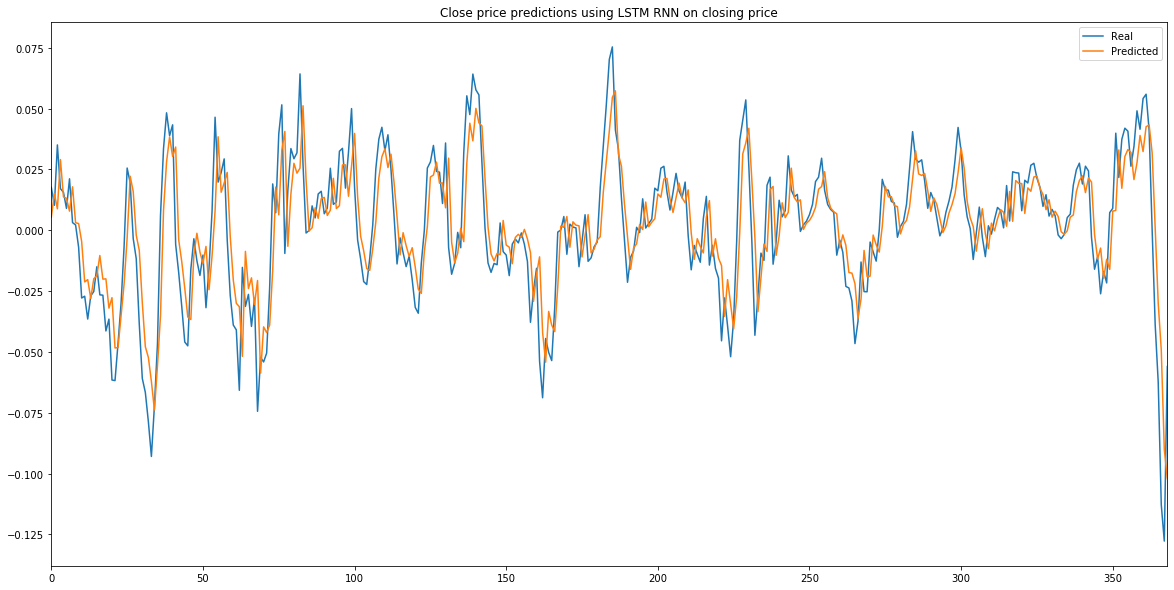

<Figure size 432x288 with 0 Axes>

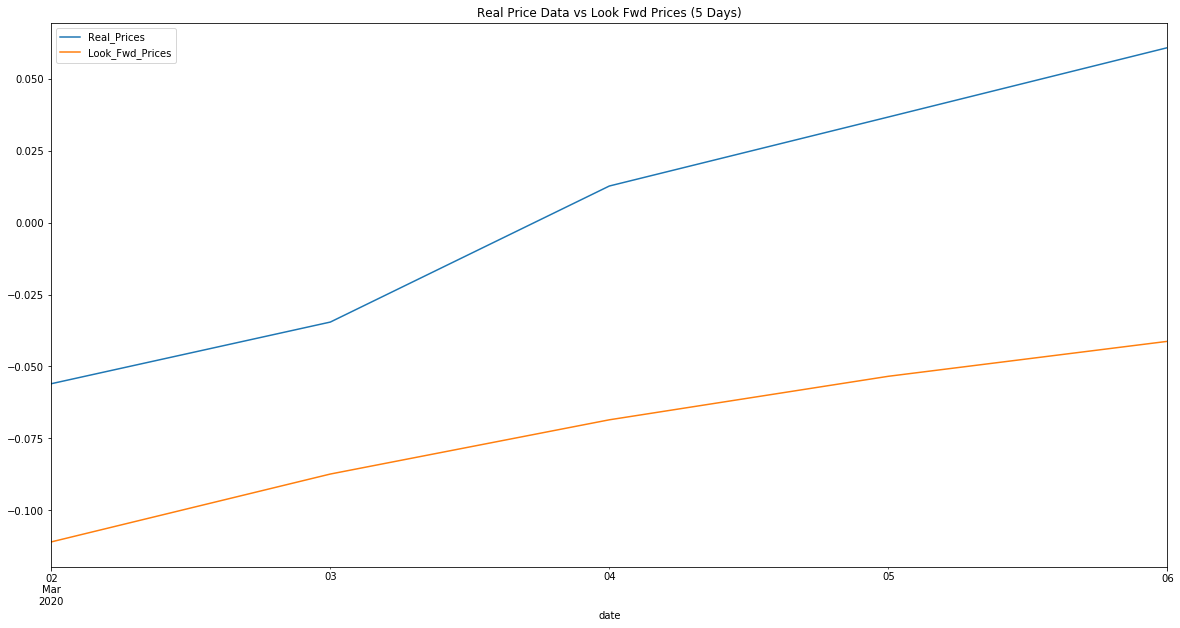

<Figure size 432x288 with 0 Axes>

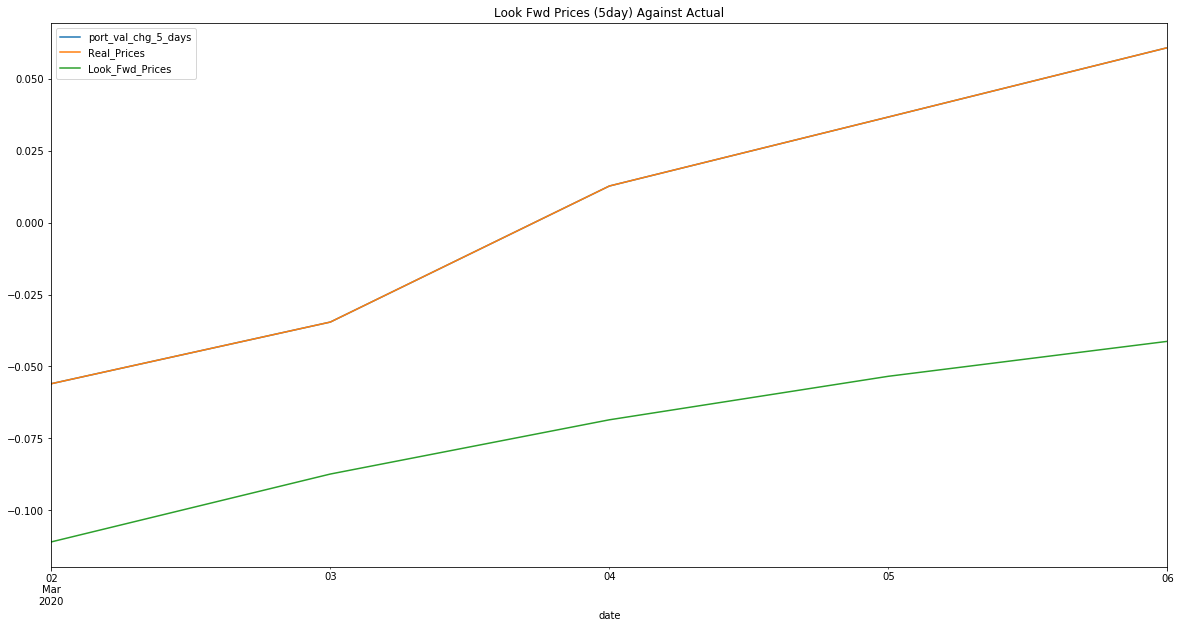

<Figure size 432x288 with 0 Axes>

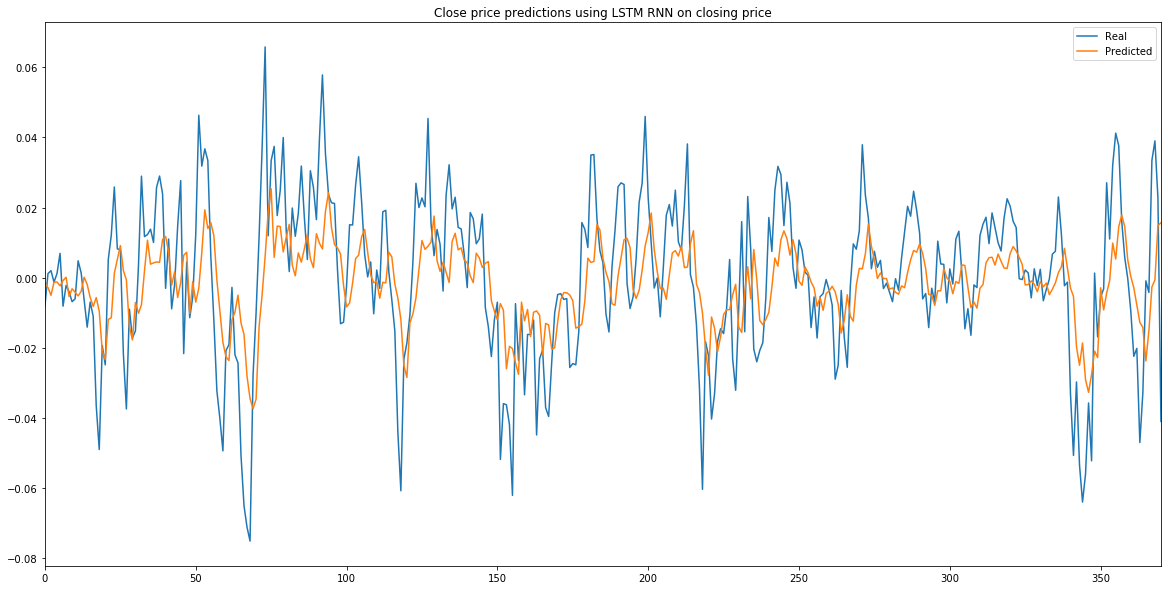

<Figure size 432x288 with 0 Axes>

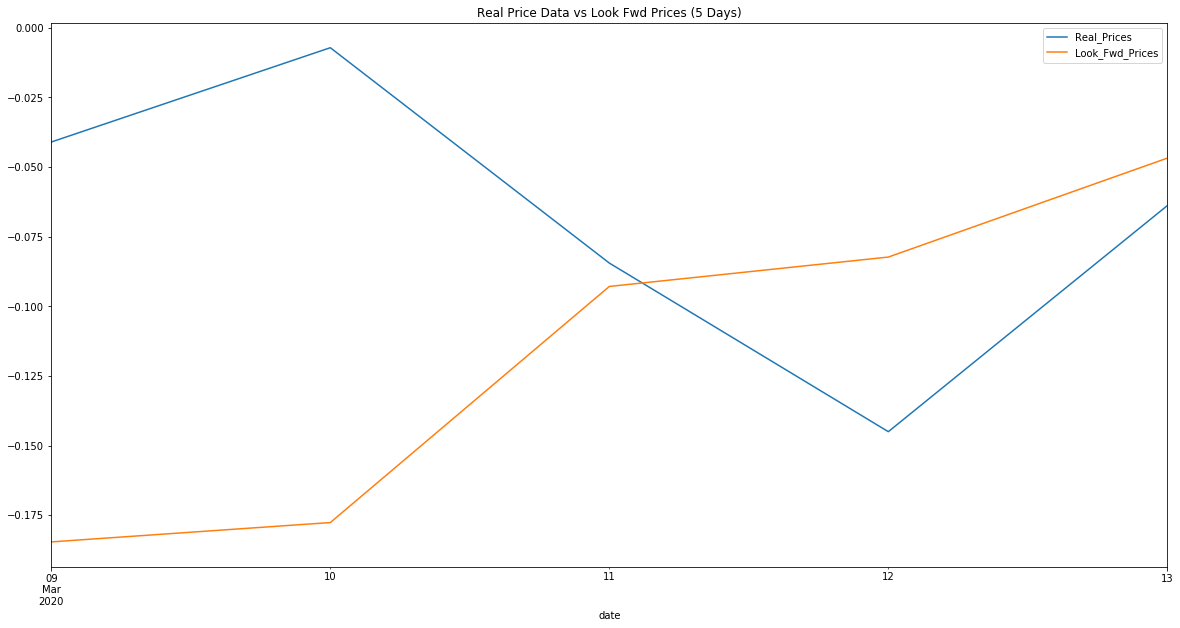

<Figure size 432x288 with 0 Axes>

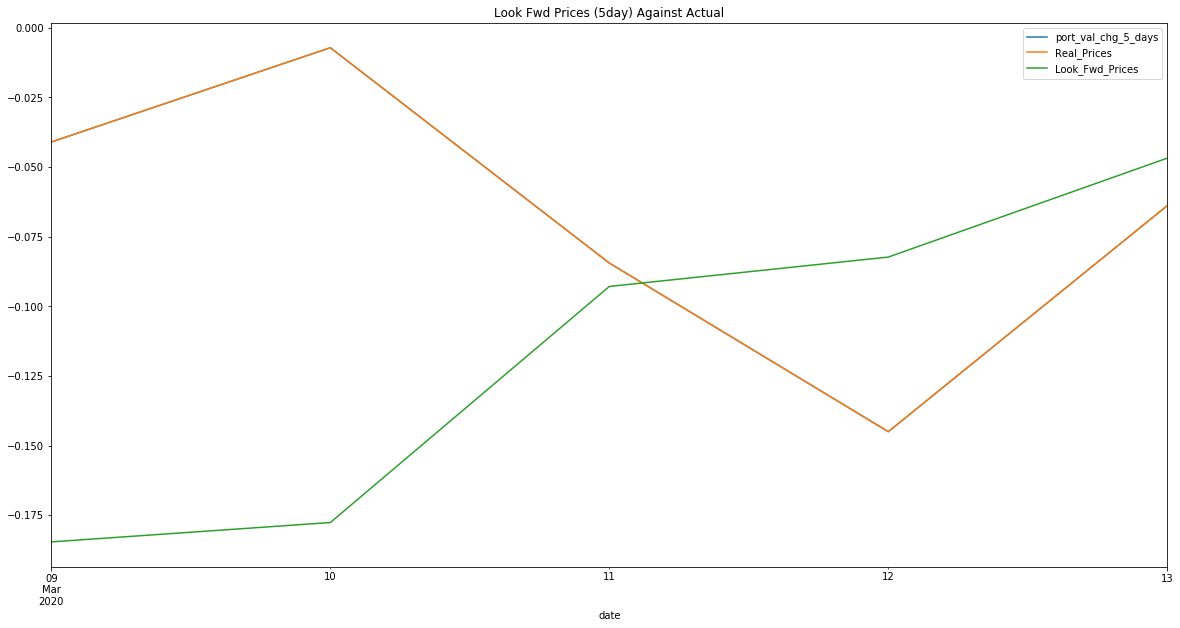

In [60]:
for i in weeks:
    LSTM_predictor(i)

# Dashboard

In [61]:
# Import additional libraries
import plotly.express as px
import panel as pn 

In [62]:
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [63]:
# Reset the index and slice specific data
short_stocks.reset_index(inplace=True)
short_stocks = short_stocks.loc[1235:1240]

In [64]:
# Reset the index and slice specific data
short_stocks2.reset_index(inplace=True)
short_stock2s = short_stocks2.loc[1235:1240]

In [65]:
# Momentum
def short_results1():
    result1 = px.line(
        short_stocks,
        title="Portfolio Value",
        y='portfolio_value',
        x='date')
    return result1

def short_results2():
    result2 = px.line(
        short_stocks2,
        title="Portfolio Value",
        y='portfolio_value',
        x='date')
    return result2

In [66]:
# Reset indexes for dataframes
look_fwd_2020.reset_index(inplace=True)
look_fwd_2020_2.reset_index(inplace=True)
stock_closing.reset_index(inplace=True)
stock_closing2.reset_index(inplace=True)

NameError: name 'look_fwd_2020' is not defined

In [ ]:
# LSTM 
def lstm_model1():
    model_summary1 = model.summary()
    return model_summary1

def lstm_model2():
    model_summary2 = model2.summary()
    return model_summary2

def stock_close1():
    stock_close_plot1 = px.line(
        stock_closing.melt(id_vars='index'),
        x='index',
        y='value',
        color='variable',
        title="Close Price Predictions using LSTM RNN on Closing Price")
    return stock_close_plot1

def stock_close2():    
    stock_close_plot2 = px.line(
        stock_closing2.melt(id_vars='index'),
        x='index',
        y='value',
        color='variable',
        title="Close Price Predictions using LSTM RNN on Closing Price")
    return stock_close_plot2

def forward_2020_1():
    LOOK_FWD_2020 = px.line(
        look_fwd_2020.melt(id_vars="date"), 
        x='date', 
        y='value', 
        color='variable',
        title='Look Fwd Prices (5-days) Against Actual')
    return LOOK_FWD_2020

def forward_2020_2():
    LOOK_FWD_2020_2 = px.line(
        look_fwd_2020_2.melt(id_vars="date"),
        x='date',
        y='value',
        color='variable',
        title='Look Fwd Prices (5-days) Against Actual')
    return LOOK_FWD_2020_2

In [ ]:
# Tab for Momentum
momentum_col = pn.Column(
    '## Short-term Stocks',
    x_short,
    '## Mid-term Stocks',
    x_mid
)

momentum_results = pn.Column(
    '## Momentum: Short-term - Week 1',
    short_results1(),
    '## Momentum: Short-term - Week 2',
    short_results2()
)

In [ ]:
# Tab for LSTM
LSTM_row = pn.Row(
    "## LSTM Summary", 
    lstm_model1(),
    lstm_model2()
)

IN_SAMP_row = pn.Row(
    stock_close1(),
    stock_close2()
)

OUT_SAMP_row = pn.Row(
    forward_2020_1(),
    forward_2020_2()
)

comparison_col = pn.Column(
    LSTM_row,
    IN_SAMP_row,
    OUT_SAMP_row
)

WK1_col = pn.Column(
    lstm_model1(),
    stock_close1(),
    forward_2020_1()
)

WK2_col = pn.Column(
    lstm_model2(),
    stock_close2(),
    forward_2020_2()
)

In [ ]:
# Create tabs for dashboard
dashboard = pn.Tabs(
    ("Momentum Stock Selection", momentum_col),
    ("Momentum Stock Results", momentum_results),
    ("Comparison using LSTM", LSTM_row),
    ("LSTM - Week 1", WK1_col),
    ("LSTM - Week 2", WK2_col)
)